# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 

<!-- 
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

In [2]:
import wave
f = wave.open("./resources/bach_orig.wav", "rb")
params = f.getparams()
print("Что лежит в файле:", params)
print("Частота дискретизации:", f.getframerate())
print("Количество байт квантования:", f.getsampwidth())

Что лежит в файле: _wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=1886512, comptype='NONE', compname='not compressed')
Частота дискретизации: 44100
Количество байт квантования: 2


### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

Частота дискретизации: 44100


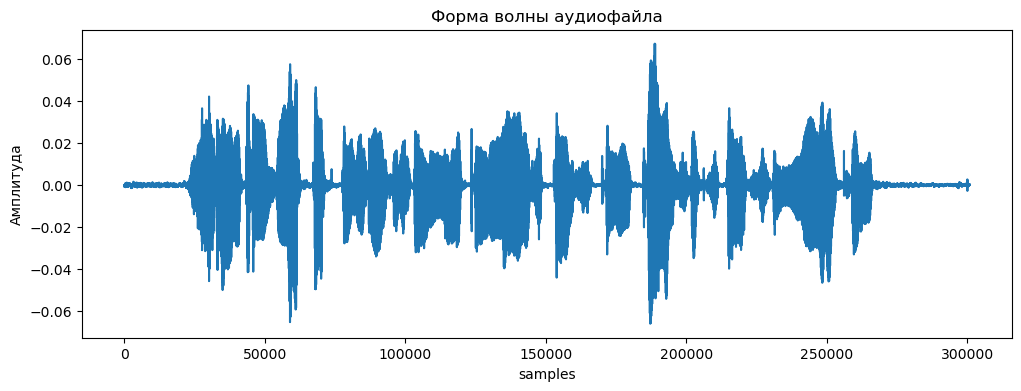

In [3]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio


filename = './resources/MyVoice.wav' 
audio, sr = librosa.load(filename, sr=None)  
print(f"Частота дискретизации: {sr}")

display(Audio(filename))

plt.figure(figsize=(12, 4))
plt.plot(audio)
plt.title('Форма волны аудиофайла')
plt.xlabel('samples')
plt.ylabel('Амплитуда')
plt.show()

In [4]:
sr_new = 4000  
audio_resampled = librosa.resample(audio, orig_sr=sr, target_sr=sr_new)

print(f"Новая частота дискретизации: {sr_new}")
display(Audio(audio_resampled, rate=sr_new))

Новая частота дискретизации: 4000


In [5]:
for new_sr in [8000, 6000, 4000, 3000]:
    audio_resampled = librosa.resample(audio, orig_sr=sr, target_sr=new_sr)
    print(f"Частота дискретизации: {new_sr}")
    display(Audio(audio_resampled, rate=new_sr))

Частота дискретизации: 8000


Частота дискретизации: 6000


Частота дискретизации: 4000


Частота дискретизации: 3000


При частоте дискретизации <3000 Гц аудиофайл не воспроизводится. При 3000 Гц речь ее разборчива, но качество звука довольно низкое.

### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

.wav — это аудиоформат, который обычно не использует сжатие, что обеспечивает высокое качество звука, но приводит к большему объему файла; он поддерживает частоту дискретизации 44,1 кГц и битовую глубину 8 или 16 бит.



# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [6]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    #plt.yticks(np.arange((data.min().round())//10*10, 
                         #(data.max().round())//10*10+10, step=5))
    plt.yticks(np.arange((min(data).round())//10*10, 
                         (max(data).round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k', 
        linewidth = 1)
    plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
    plt.show()

In [7]:
# Читаем данные с подготовленными сигналами
import pickle
with open("resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

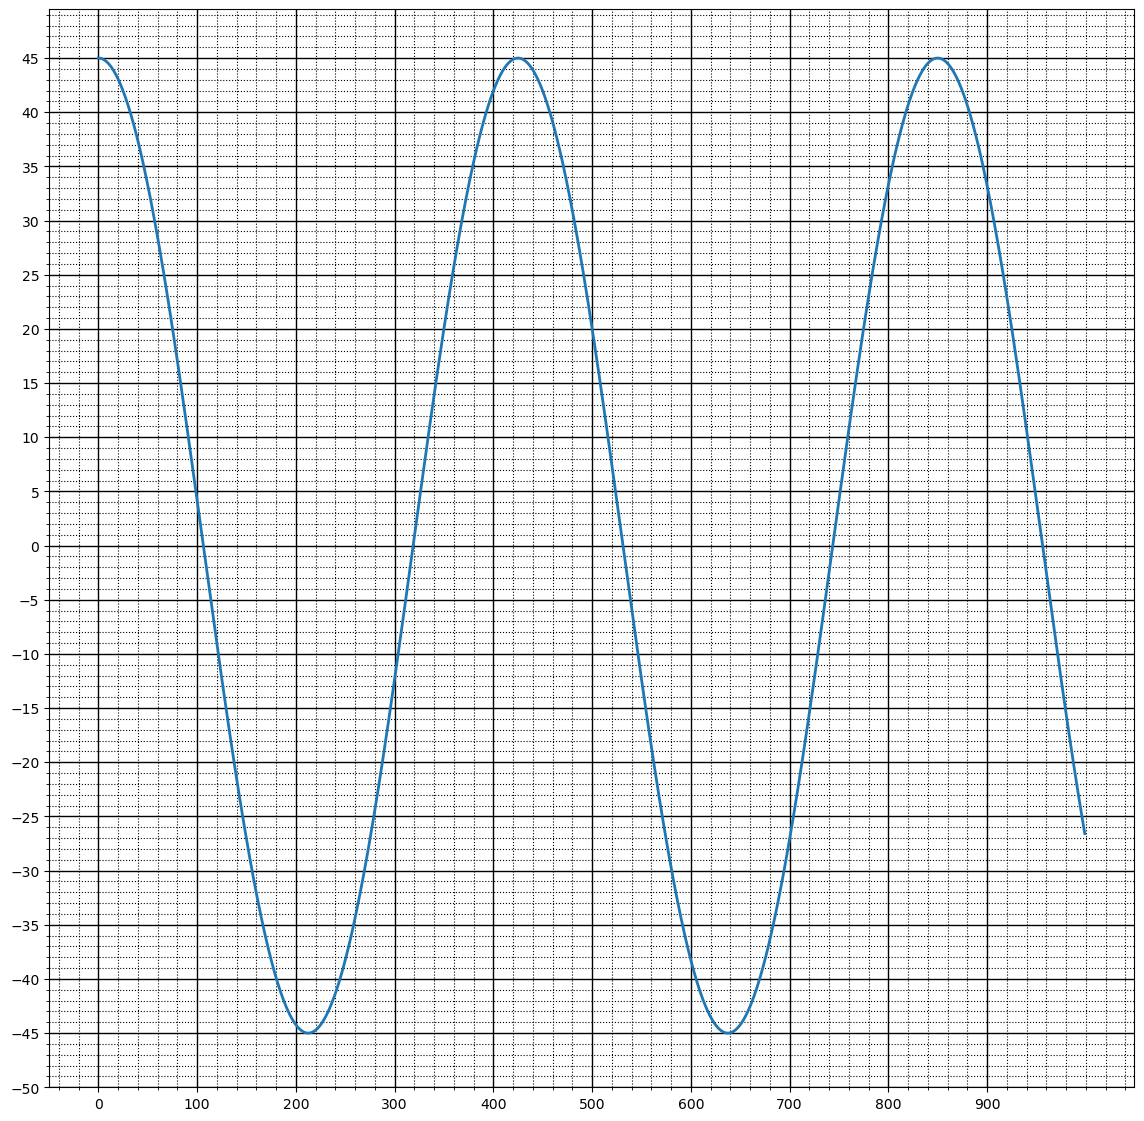

In [8]:
draw_signal(test_data['task2']['a'])

In [9]:
# YOUR CODE HERE
i = np.arange(0, 1000, 1)  
a = 45 * np.cos(i * 2 * np.pi / 425) 

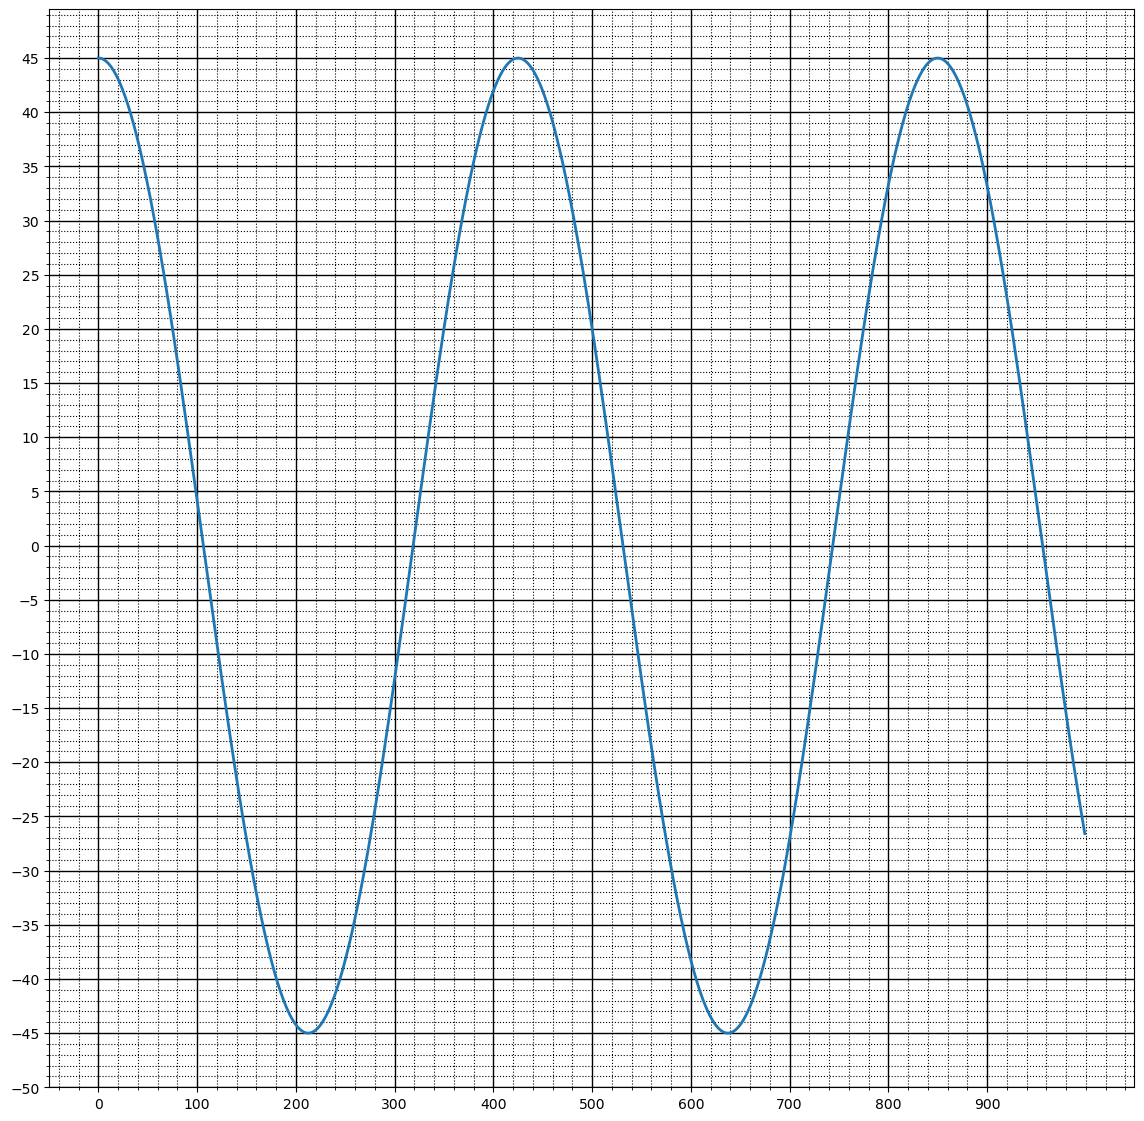

In [10]:
draw_signal(a)

In [11]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= 45$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = \frac{2\pi}{425}$

3. Фаза - $\phi= 0$

### Сигнал ***b***

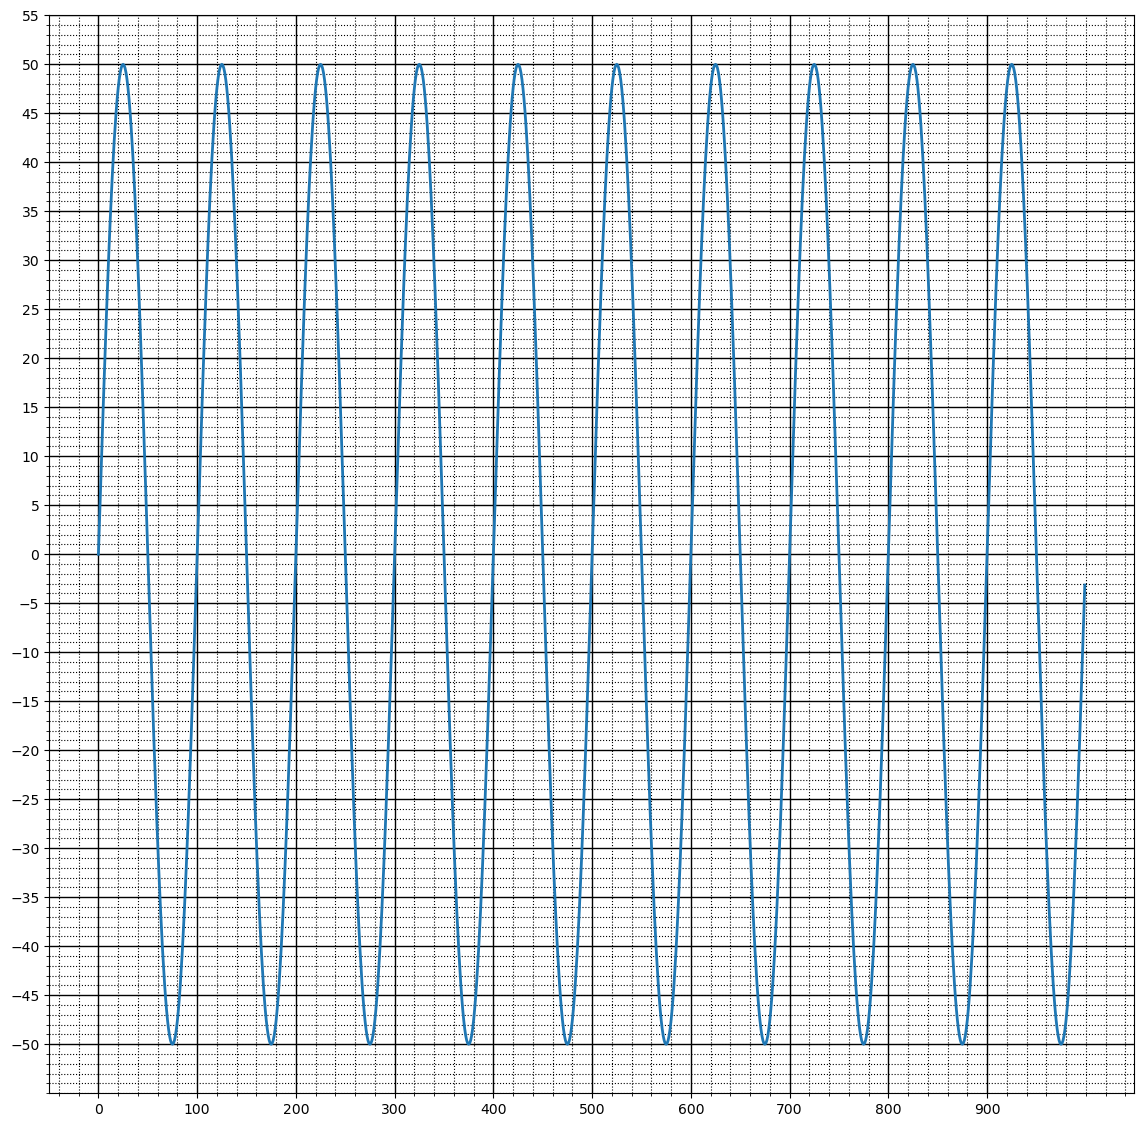

In [12]:
draw_signal(test_data['task2']['b'])

In [13]:
# YOUR CODE HERE
i = np.arange(0, 1000, 1) 
b = 50 * np.sin(i * 2 * np.pi / 100)

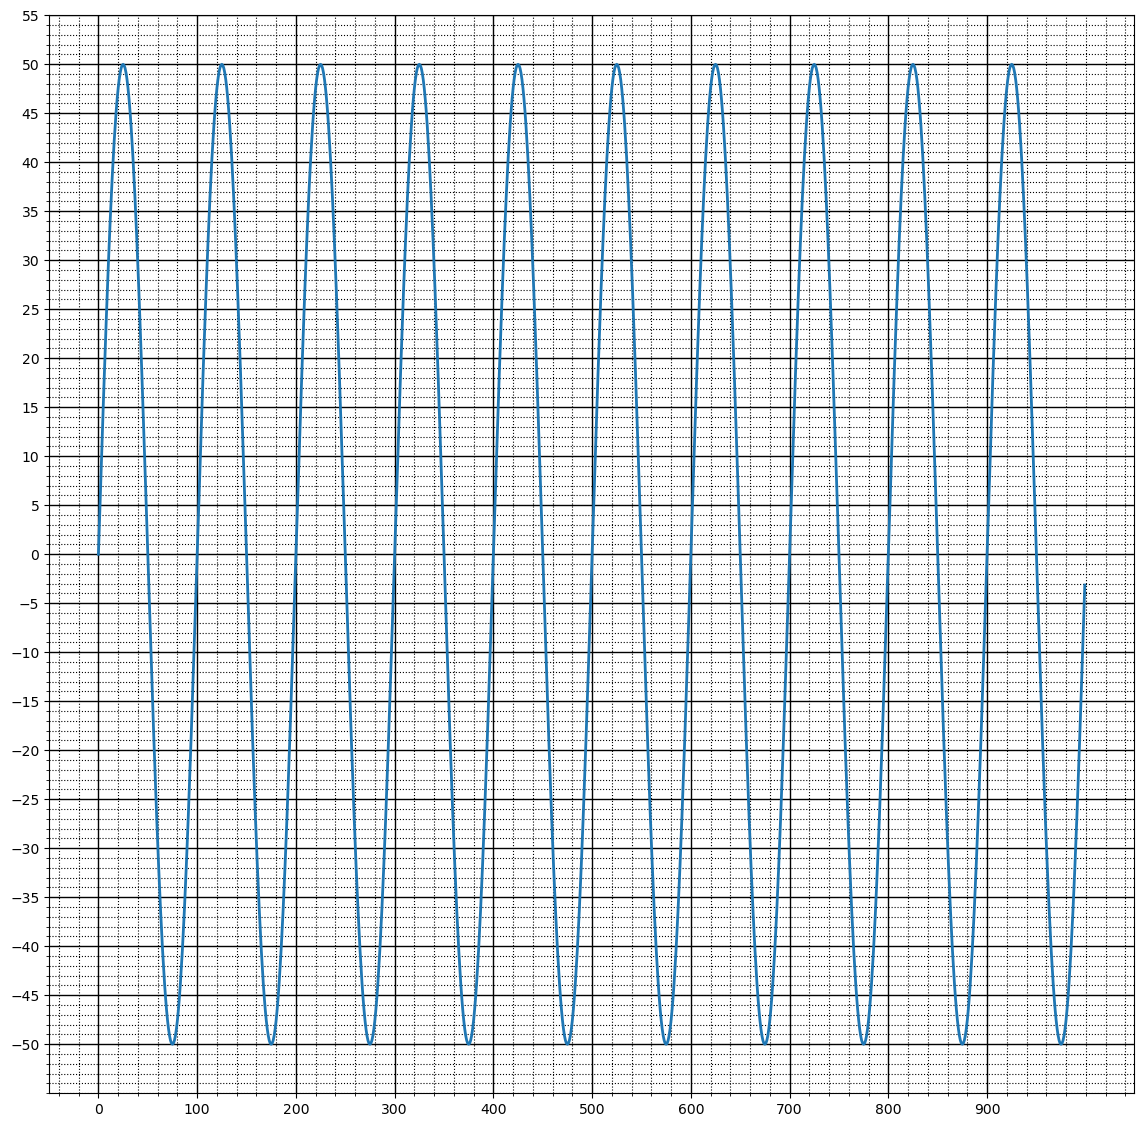

In [14]:
draw_signal(b)

In [15]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= 50$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = \frac{2\pi}{100}$

3. Фаза - $\phi= \frac\pi 2$

### Сигнал ***c***

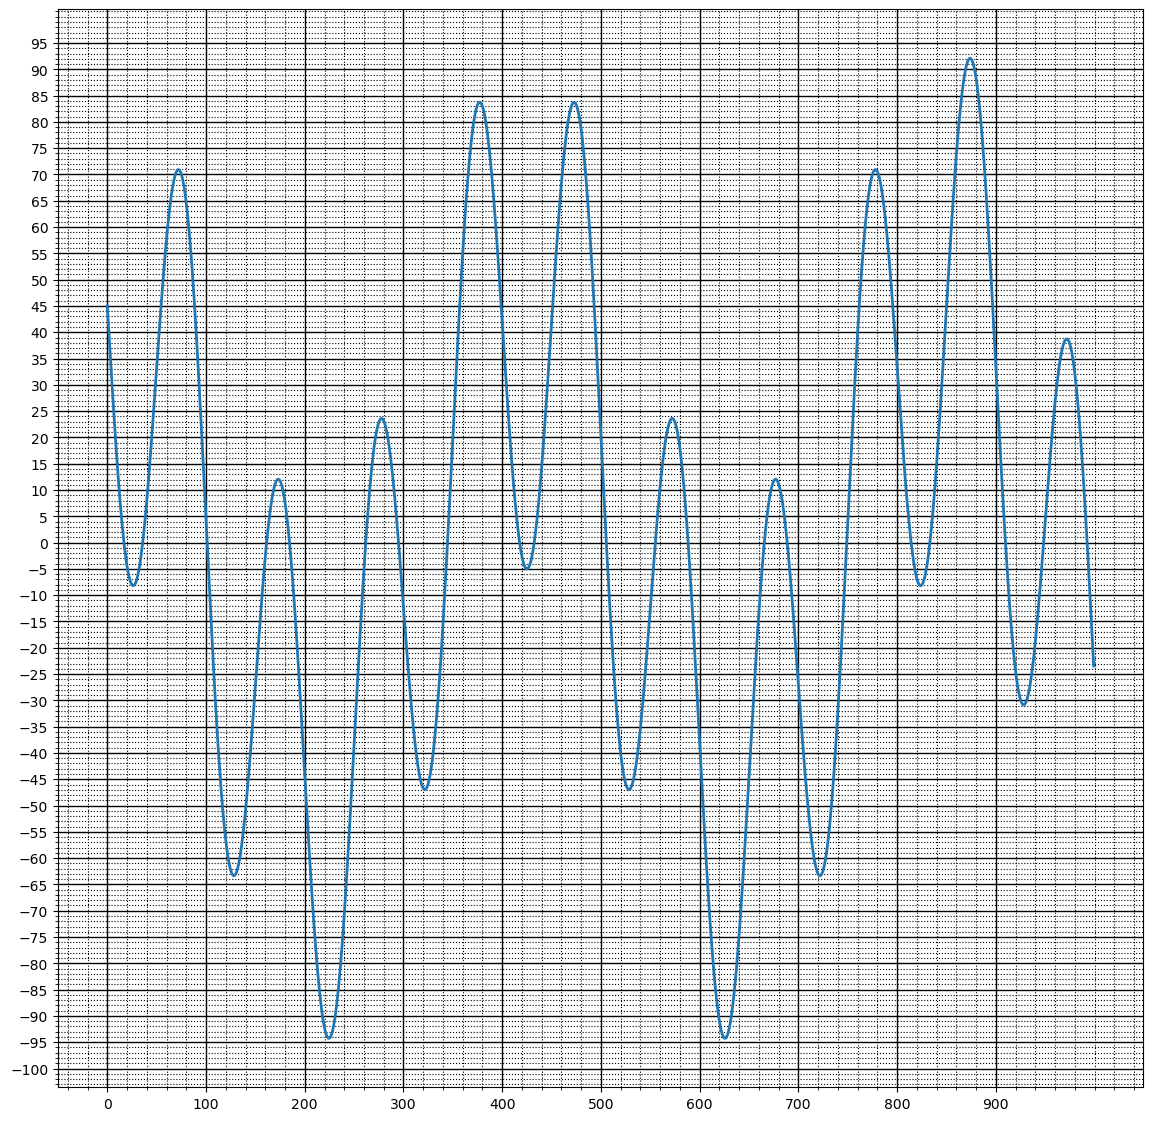

In [16]:
draw_signal(test_data['task2']['c'])

In [17]:
# сигнал состоит из двух гармоник
# YOUR CODE HERE
c = [45*np.cos(i*2*np.pi/425) + 
     50*np.sin(i*2*np.pi/100+np.pi) 
     for i in np.arange(0,1000,1)]

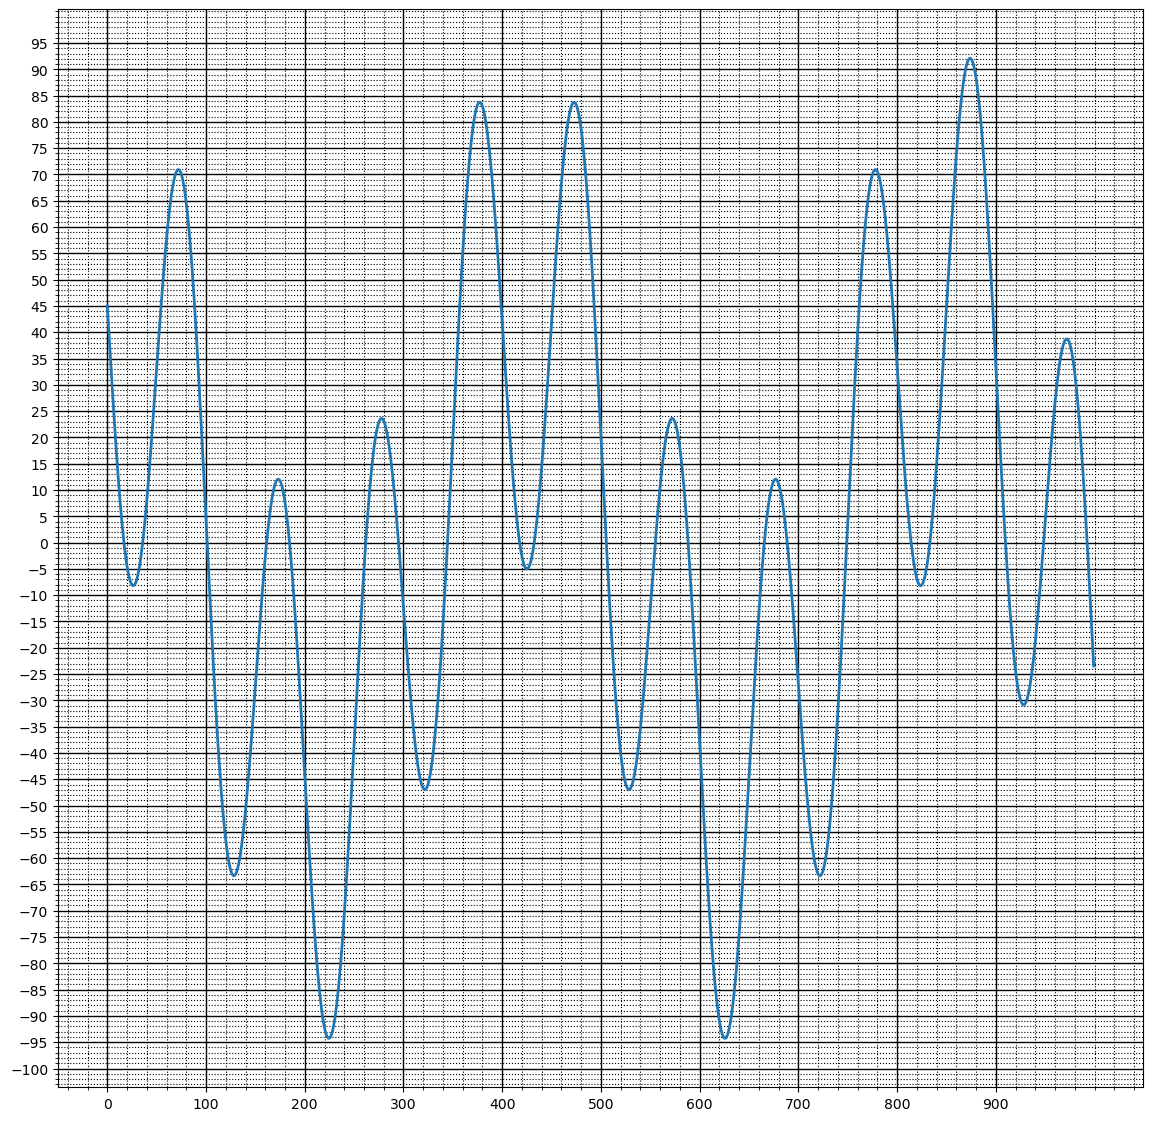

In [18]:
draw_signal(c)

In [19]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [20]:
def convolve(in1, in2):
    len_in1 = len(in1)
    len_in2 = len(in2)
    
    output_len = len_in1 + len_in2 - 1
    result = np.zeros(output_len)
    

    for i in range(len_in1): 
        for j in range(len_in2): 
            result[i + j] += in1[i] * in2[j]  
    
    return result


In [21]:
import scipy
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [22]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

In [23]:
test_convolve(a, b, print_debug=False)

Ok!


### Нарисуйте результат свертки a и b

Сигнал **а**

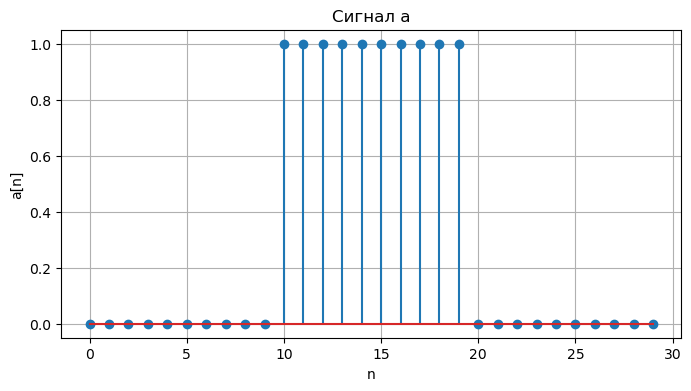

In [24]:
plt.figure(figsize=(8, 4))
plt.stem(a)
plt.title('Сигнал a')
plt.xlabel('n')
plt.ylabel('a[n]')
plt.grid()
plt.show()

Сигнал **b**

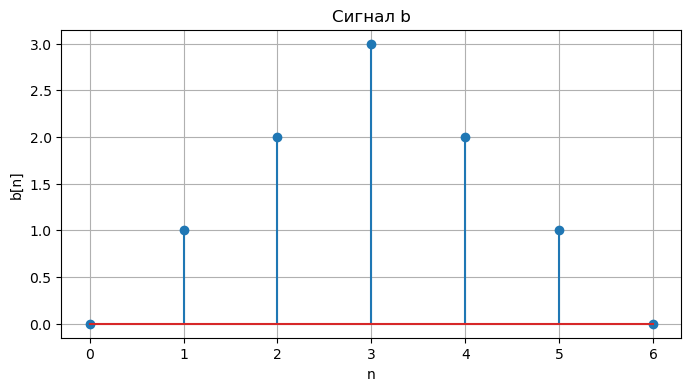

In [25]:
plt.figure(figsize=(8, 4))
plt.stem(b)
plt.title('Сигнал b')
plt.xlabel('n')
plt.ylabel('b[n]')
plt.grid()
plt.show()

Свертка **a** и **b**

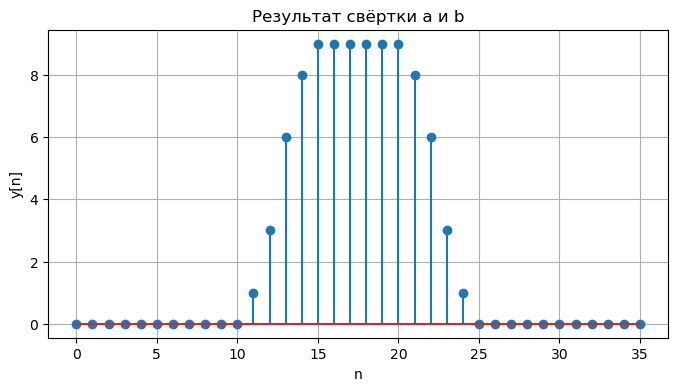

In [26]:
my_result = convolve(a, b)
plt.figure(figsize=(8, 4))
plt.stem(my_result)
plt.title('Результат свёртки a и b')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.grid()
plt.show()

Все 3 графика на одной картинке:

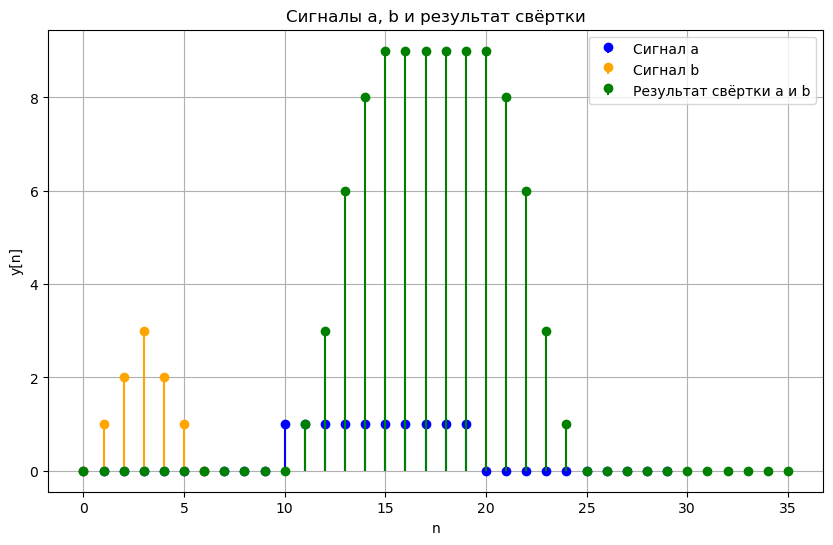

In [27]:
plt.figure(figsize=(10, 6))

plt.stem(a, linefmt='b-', markerfmt='bo', basefmt=' ', label='Сигнал a')
plt.stem(b, linefmt='orange', markerfmt='o', basefmt=' ', label='Сигнал b')
plt.stem(my_result, linefmt='g-', markerfmt='go', basefmt=' ', label='Результат свёртки a и b')

plt.title('Сигналы a, b и результат свёртки')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.legend()
plt.grid()

plt.show()

# Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [28]:
def karplus_strong(noise, N):
    y = np.zeros(N)
    y[:len(noise)] = noise
    
    for n in range(len(noise), N):
        y[n] = (y[n - len(noise)] + y[n - len(noise) - 1]) / 2

    return y

In [29]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

All Ok!


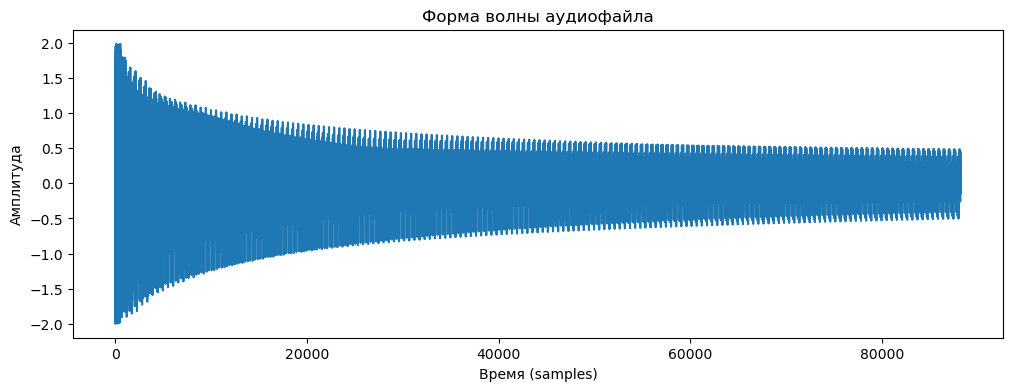

In [30]:
plt.figure(figsize=(12, 4))
plt.plot(gen_wav)
plt.title('Форма волны аудиофайла')
plt.xlabel('Время (samples)')
plt.ylabel('Амплитуда')
plt.show()

In [31]:
import sounddevice as sd
import ipywidgets as widgets
from IPython.display import display

def play_sound(b):
    sd.play(gen_wav, samplerate=sample_rate)
    sd.wait()  


play_button = widgets.Button(description="Воспроизвести звук")
play_button.on_click(play_sound)

display(play_button)

Button(description='Воспроизвести звук', style=ButtonStyle())

### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

In [32]:
def generate_guitar_note(frequency, duration, sample_rate=44100):
    noise = 2 * np.random.uniform(-1, 1, int(sample_rate / frequency))
    gen_len = int(sample_rate * duration)
    return karplus_strong(noise, gen_len)

sample_rate = 44100
frequencies = [82.41, 110.00, 146.83, 196.00, 246.94]  
durations = [1, 1, 1, 1, 1]  

Визуализируем затухание амплитуды:

In [33]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

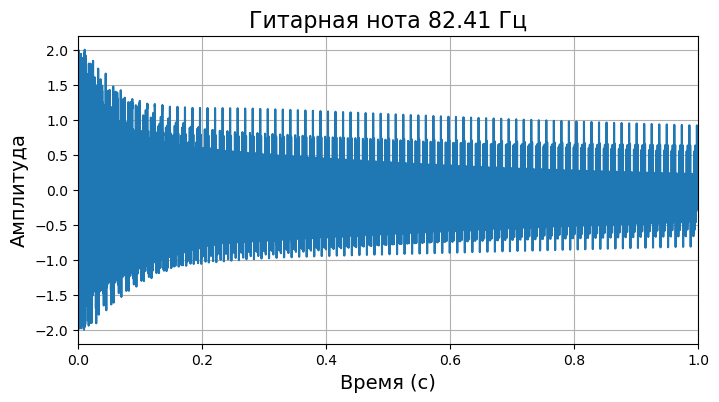

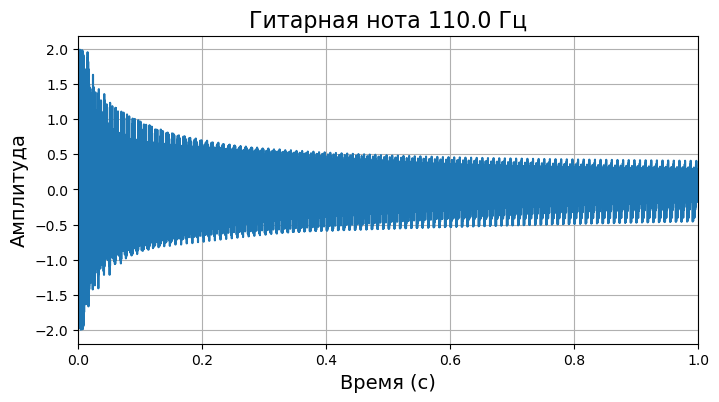

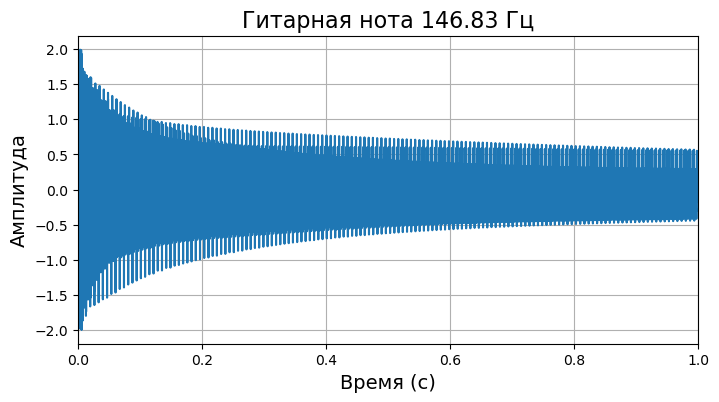

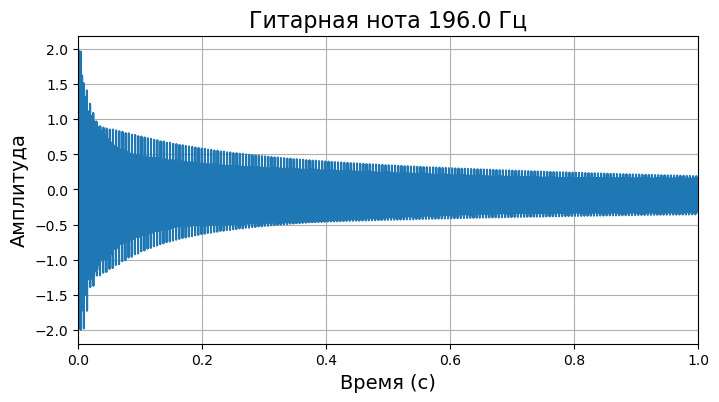

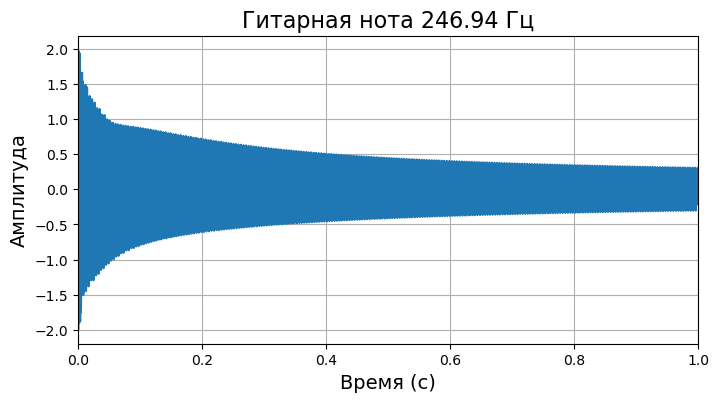

In [35]:
for i, freq in enumerate(frequencies):
    note = generate_guitar_note(freq, durations[i])
    
    plt.figure(figsize=(8, 4))
    time = np.arange(len(note)) / sample_rate
    
    plt.plot(time, note)
    plt.title(f'Гитарная нота {freq} Гц', fontsize=16)
    plt.xlabel('Время (с)', fontsize=14)
    plt.ylabel('Амплитуда', fontsize=14)
    plt.xlim(0, len(note) / sample_rate)  
    plt.grid()
    plt.show()